# StumbleUpon Evergreen Classification Challenge

In [1]:
!curl --header "Host: doc-0k-5c-docs.googleusercontent.com" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header "Accept-Language: en-US,en;q=0.9" --header "Cookie: AUTH_hpu11s1pld7o9bp1p8g1qieamukv1sta_nonce=u3bh166om32pc" --header "Connection: keep-alive" "https://doc-0k-5c-docs.googleusercontent.com/docs/securesc/buh41koleo95ehjvigsb5hjcrtrndj6j/8j23l5uqa3vmq4erm8plgon1h7hvse4t/1613567250000/11300042042739227959/11300042042739227959/1NyYOSeSUAg66C_-3GflSsrSlhkcv-DL2?e=download&authuser=1&nonce=u3bh166om32pc&user=11300042042739227959&hash=j515a4k01crgkie5cm53krhlrdfb1gbe" -L -o "StumbleUpon Evergreen Classification Challenge Internshala-20210215T170949Z-001.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  253M    0  253M    0     0   129M      0 --:--:--  0:00:01 --:--:--  129M


In [2]:
import zipfile
with zipfile.ZipFile('./StumbleUpon Evergreen Classification Challenge Internshala-20210215T170949Z-001.zip', 'r') as zip_ref:
    zip_ref.extractall()

## As the test data class labels are unknown and to be run on kaggle server, we will see precision, recall values of cv data

## Importing packages

In [3]:
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import warnings
warnings.filterwarnings("ignore")
import json
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


## Reading train and test files

In [4]:
train_data = pd.read_csv('./StumbleUpon Evergreen Classification Challenge Internshala/train.tsv',sep='\t')
train_data.head(3)

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,1,1,55,0,2240,258,11,0.166667,0.057613,1


In [5]:
test_data = pd.read_csv('./StumbleUpon Evergreen Classification Challenge Internshala/test.tsv',sep='\t')
test_data.head(3)

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
0,http://www.lynnskitchenadventures.com/2009/04/...,5865,"{""title"":""Homemade Enchilada Sauce Lynn s Kitc...",recreation,0.443906,2.558140,0.389706,0.257353,0.044118,0.022059,...,0.199438,1,1,15,0,5643,136,3,0.242647,0.080597
1,http://lolpics.se/18552-stun-grenade-ar,782,"{""title"":""lolpics Stun grenade ar "",""body"":"" f...",culture_politics,0.135844,3.771429,0.461538,0.205128,0.051282,0.000000,...,0.080000,?,1,62,0,382,39,2,0.128205,0.176471
2,http://www.xcelerationfitness.com/treadmills.html,6962,"{""title"":""Treadmills "",""body"":"" treadmills, st...",?,?,2.269565,0.495726,0.384615,0.170940,0.170940,...,10.000000,?,1,42,0,2420,117,1,0.581197,0.125000


## Checking for null values

In [6]:
train_data.isnull().sum()     

url                               0
urlid                             0
boilerplate                       0
alchemy_category                  0
alchemy_category_score            0
avglinksize                       0
commonlinkratio_1                 0
commonlinkratio_2                 0
commonlinkratio_3                 0
commonlinkratio_4                 0
compression_ratio                 0
embed_ratio                       0
framebased                        0
frameTagRatio                     0
hasDomainLink                     0
html_ratio                        0
image_ratio                       0
is_news                           0
lengthyLinkDomain                 0
linkwordscore                     0
news_front_page                   0
non_markup_alphanum_characters    0
numberOfLinks                     0
numwords_in_url                   0
parametrizedLinkRatio             0
spelling_errors_ratio             0
label                             0
dtype: int64

In [7]:
test_data.isnull().sum()     

url                               0
urlid                             0
boilerplate                       0
alchemy_category                  0
alchemy_category_score            0
avglinksize                       0
commonlinkratio_1                 0
commonlinkratio_2                 0
commonlinkratio_3                 0
commonlinkratio_4                 0
compression_ratio                 0
embed_ratio                       0
framebased                        0
frameTagRatio                     0
hasDomainLink                     0
html_ratio                        0
image_ratio                       0
is_news                           0
lengthyLinkDomain                 0
linkwordscore                     0
news_front_page                   0
non_markup_alphanum_characters    0
numberOfLinks                     0
numwords_in_url                   0
parametrizedLinkRatio             0
spelling_errors_ratio             0
dtype: int64

In [8]:
train_data.columns.values

array(['url', 'urlid', 'boilerplate', 'alchemy_category',
       'alchemy_category_score', 'avglinksize', 'commonlinkratio_1',
       'commonlinkratio_2', 'commonlinkratio_3', 'commonlinkratio_4',
       'compression_ratio', 'embed_ratio', 'framebased', 'frameTagRatio',
       'hasDomainLink', 'html_ratio', 'image_ratio', 'is_news',
       'lengthyLinkDomain', 'linkwordscore', 'news_front_page',
       'non_markup_alphanum_characters', 'numberOfLinks',
       'numwords_in_url', 'parametrizedLinkRatio',
       'spelling_errors_ratio', 'label'], dtype=object)

## Checking for unique values

In [9]:
len(train_data['url'].unique())

7395

In [10]:
urls = train_data['url']
urls[0]

'http://www.bloomberg.com/news/2010-12-23/ibm-predicts-holographic-calls-air-breathing-batteries-by-2015.html'

### Here "boilerplate" is a json data

In [11]:
boiler_plate = train_data['boilerplate']
boiler_plate[560]

'{"url":"inc minda zetlin listening to complainers is bad for your brain","title":"Complainers in the Office 3 Ways to Deal With Them listening to complainers is bad for your brain listening to complainers is bad for your brain","body":"Exposure to non stop negativity actually impairs brain function Here s how to defend yourself shutterstock images Do you hate it when people complain It turns out there s a good reason Listening to too much complaining is bad for your brain in multiple ways according to Trevor Blake a serial entrepreneur and author of Three Simple Steps A Map to Success in Business and Life In the book he describes how neuroscientists have learned to measure brain activity when faced with various stimuli including a long gripe session The brain works more like a muscle than we thought Blake says So if you re pinned in a corner for too long listening to someone being negative you re more likely to behave that way as well Even worse being exposed to too much complaining c

In [12]:
f = json.loads(train_data['boilerplate'][3000])
f['title']

'Alex Morgan Swimsuit Issue The 10 Biggest Up and Coming Hotties in Sports alex morgan swimsuit issue: the 10 biggest up and coming hotties in sports'

## Reading the json data column

In [13]:
list1 = []
for i in range(train_data.shape[0]):
  f = json.loads(train_data['boilerplate'][i])
  list1.append(f)

In [14]:
list2 = []
for i in range(test_data.shape[0]):
  f = json.loads(test_data['boilerplate'][i])
  list2.append(f)

## Creating the DataFrame

In [15]:
train_df = pd.DataFrame.from_records(list1)
train_df['urlid'] = train_data['urlid']
train_df['label'] = train_data['label']
train_df['alchemy_category'] = train_data['alchemy_category']
train_df['image_ratio'] = train_data['image_ratio']
train_df['numberOfLinks'] = train_data['numberOfLinks']

train_df = train_df.drop(columns=['related'],axis=1)
train_df.head()

,title,body,url,urlid,label,alchemy_category,image_ratio,numberOfLinks
0,IBM Sees Holographic Calls Air Breathing Batte...,A sign stands outside the International Busine...,bloomberg news 2010 12 23 ibm predicts hologra...,4042,0,business,0.003883,170
1,The Fully Electronic Futuristic Starting Gun T...,And that can be carried on a plane without the...,popsci technology article 2012 07 electronic f...,8471,1,recreation,0.088652,187
2,Fruits that Fight the Flu fruits that fight th...,Apples The most popular source of antioxidants...,menshealth health flu fighting fruits cm mmc F...,1164,1,health,0.120536,258
3,10 Foolproof Tips for Better Sleep,There was a period in my life when I had a lot...,dumblittleman 2007 12 10 foolproof tips for be...,6684,1,health,0.035343,120
4,The 50 Coolest Jerseys You Didn t Know Existed...,Jersey sales is a curious business Whether you...,bleacherreport articles 1205138 the 50 coolest...,9006,0,sports,0.050473,162


In [16]:
test_df = pd.DataFrame.from_records(list2)
test_df['urlid'] = test_data['urlid']
test_df['alchemy_category'] = test_data['alchemy_category']
test_df['image_ratio'] = test_data['image_ratio']
test_df['numberOfLinks'] = test_data['numberOfLinks']

test_df = test_df.drop(columns=['related'],axis=1)
test_df.head()

,title,body,url,urlid,alchemy_category,image_ratio,numberOfLinks
0,Homemade Enchilada Sauce Lynn s Kitchen Advent...,I usually buy my enchilada sauce Yes I knew I ...,lynnskitchenadventures 2009 04 homemade enchil...,5865,recreation,0.199438,136
1,lolpics Stun grenade ar,funny pictures at lolpics.se. the best funny ...,lolpics se 18552 stun grenade ar,782,culture_politics,0.080000,39
2,Treadmills,"treadmills, stair, climbers, treadmills",xcelerationfitness treadmills html,6962,?,10.000000,117
3,Father s Tactics Used by Assad to Crush Revolt...,Enlarge image Syrian President Bashar al Assad...,bloomberg news 2012 02 06 syria s assad deploy...,7640,culture_politics,0.005964,309
4,Stem Turns Lemons and Limes Into Juicy Atomize...,Quirky s Stem turns any citrus fruit into an a...,wired gadgetlab 2011 12 stem turns lemons and ...,3589,science_technology,0.035714,155


## Checking for null values

In [17]:
train_df.isnull().sum()

title               13
body                57
url                 60
urlid                0
label                0
alchemy_category     0
image_ratio          0
numberOfLinks        0
dtype: int64

In [18]:
test_df.isnull().sum()

title                5
body                20
url                 30
urlid                0
alchemy_category     0
image_ratio          0
numberOfLinks        0
dtype: int64

## Checking unique values in 'alchemy_category'

In [19]:
train_df['alchemy_category'].value_counts()

?                     2342
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

## Replacing the unknown values

In [20]:
train_df['alchemy_category'].replace({'?':'unknown'},inplace=True)

In [21]:
test_df['alchemy_category'].replace({'?':'unknown'},inplace=True)

In [22]:
test_df['alchemy_category'].value_counts()

unknown               1046
recreation             472
arts_entertainment     422
business               355
health                 200
sports                 186
culture_politics       156
computer_internet      134
science_technology     120
religion                35
gaming                  34
law_crime               11
Name: alchemy_category, dtype: int64

## Filling the null values

In [23]:
def fill_missing_data(data):
    train_df.title.fillna(value = "title", inplace = True)
    train_df.body.fillna(value = "No description yet", inplace = True)
    train_df.url.fillna(value = "url", inplace = True)
    return data

train_df = fill_missing_data(train_df) 

In [24]:
train_df.isnull().sum()

title               0
body                0
url                 0
urlid               0
label               0
alchemy_category    0
image_ratio         0
numberOfLinks       0
dtype: int64

In [25]:
def fill_missing_data(data):
    test_df.title.fillna(value = "title", inplace = True)
    test_df.body.fillna(value = "No description yet", inplace = True)
    test_df.url.fillna(value = "url", inplace = True)
    return data

test_df = fill_missing_data(test_df) 

In [26]:
test_df.isnull().sum()

title               0
body                0
url                 0
urlid               0
alchemy_category    0
image_ratio         0
numberOfLinks       0
dtype: int64

## Data Preprocessing

In [27]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
pip install bs4

     |████████████████████████████████| 115 kB 2.9 MB/s eta 0:00:01
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=d2968a9ec279e86b2b543a842875d04781975ec4157ccc10cd6a5ec411ad1756
  Stored in directory: /root/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.


In [30]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

In [31]:
from tqdm import tqdm
import seaborn as sns
from bs4 import BeautifulSoup

train_preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(train_df['title'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    train_preprocessed_titles.append(sentance.strip())

100%|██████████| 7395/7395 [00:02<00:00, 3463.36it/s]


In [32]:
from tqdm import tqdm
import seaborn as sns
from bs4 import BeautifulSoup

test_preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(test_df['title'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    test_preprocessed_titles.append(sentance.strip())

100%|██████████| 3171/3171 [00:00<00:00, 3571.35it/s]


### Pushing the preprocessed data into dataframe

In [33]:
train_preprocessed_titles[454]

'essential zen habits balanced living'

In [34]:
train_df['title'] = train_preprocessed_titles
train_df.head()

,title,body,url,urlid,label,alchemy_category,image_ratio,numberOfLinks
0,ibm sees holographic calls air breathing batte...,A sign stands outside the International Busine...,bloomberg news 2010 12 23 ibm predicts hologra...,4042,0,business,0.003883,170
1,fully electronic futuristic starting gun elimi...,And that can be carried on a plane without the...,popsci technology article 2012 07 electronic f...,8471,1,recreation,0.088652,187
2,fruits fight flu fruits fight flu cold flu men...,Apples The most popular source of antioxidants...,menshealth health flu fighting fruits cm mmc F...,1164,1,health,0.120536,258
3,foolproof tips better sleep,There was a period in my life when I had a lot...,dumblittleman 2007 12 10 foolproof tips for be...,6684,1,health,0.035343,120
4,coolest jerseys know existed coolest jerseys seen,Jersey sales is a curious business Whether you...,bleacherreport articles 1205138 the 50 coolest...,9006,0,sports,0.050473,162


In [35]:
test_df['title'] = test_preprocessed_titles
test_df.head()

,title,body,url,urlid,alchemy_category,image_ratio,numberOfLinks
0,homemade enchilada sauce lynn kitchen adventures,I usually buy my enchilada sauce Yes I knew I ...,lynnskitchenadventures 2009 04 homemade enchil...,5865,recreation,0.199438,136
1,lolpics stun grenade ar,funny pictures at lolpics.se. the best funny ...,lolpics se 18552 stun grenade ar,782,culture_politics,0.080000,39
2,treadmills,"treadmills, stair, climbers, treadmills",xcelerationfitness treadmills html,6962,unknown,10.000000,117
3,father tactics used assad crush revolt threate...,Enlarge image Syrian President Bashar al Assad...,bloomberg news 2012 02 06 syria s assad deploy...,7640,culture_politics,0.005964,309
4,stem turns lemons limes juicy atomizers gadget...,Quirky s Stem turns any citrus fruit into an a...,wired gadgetlab 2011 12 stem turns lemons and ...,3589,science_technology,0.035714,155


## Creating X and y

In [36]:
X = train_df.drop(columns=['label'],axis=1)
y = train_df['label']

## Creating train and cv data 

In [37]:
X_train,X_cv,y_train,y_cv=train_test_split(X,y,test_size=0.25,random_state=42)

In [38]:

print(X_train.shape)
print(X_cv.shape)
print(y_train.shape)
print(y_cv.shape)

(5546, 7)
(1849, 7)
(5546,)
(1849,)


## Featurization (vectorization)

In [183]:
# Using TfIdf Vectorization on body data
tf_vect_body = TfidfVectorizer(ngram_range=(1,2),lowercase=True)
tf_vect_body.fit(X_train['body'].values) 
body_train_tf = tf_vect_body.transform(X_train['body'].values)
body_cv_tf = tf_vect_body.transform(X_cv['body'].values)           
body_test_tf = tf_vect_body.transform(test_df['body'].values)

In [184]:
# Using Count Vectorization on title data
cnt_vect_title = CountVectorizer(lowercase=True)
cnt_vect_title.fit(X_train['title'].values)
title_train_cnt = cnt_vect_title.transform(X_train['title'].values)
title_cv_cnt = cnt_vect_title.transform(X_cv['title'].values)
title_test_cnt = cnt_vect_title.transform(test_df['title'].values)

In [185]:
# Using Count Vectorization on url data
cnt_vect_url = CountVectorizer(lowercase=True)
cnt_vect_url.fit(X_train['url'].values)
url_train_cnt = cnt_vect_url.transform(X_train['url'].values)
url_cv_cnt = cnt_vect_url.transform(X_cv['url'].values)
url_test_cnt = cnt_vect_url.transform(test_df['url'].values)

In [186]:
# Using Label Encoder on alchemy_category

le = LabelEncoder()
le.fit(X_train['alchemy_category'])
alch_catg_train_le = le.transform(X_train['alchemy_category'])
alch_catg_cv_le = le.transform(X_cv['alchemy_category'])
alch_catg_test_le = le.transform(test_df['alchemy_category'])

In [187]:
train_data.head(2)

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,1,1,40,0,4973,187,9,0.181818,0.125448,1


In [188]:
alch_catg_train_le = alch_catg_train_le.reshape(-1,1)
alch_catg_train_le.shape

(5546, 1)

In [189]:
alch_catg_cv_le = alch_catg_cv_le.reshape(-1,1)
alch_catg_cv_le.shape

(1849, 1)

In [190]:
alch_catg_test_le = alch_catg_test_le.reshape(-1,1)
alch_catg_test_le.shape

(3171, 1)

In [191]:
train_df.columns

Index(['title', 'body', 'url', 'urlid', 'label', 'alchemy_category',
       'image_ratio', 'numberOfLinks'],
      dtype='object')

## Combining using Horizontal Stacking

In [195]:
from scipy.sparse import hstack
x_final_train = hstack((title_train_cnt,body_train_tf,url_train_cnt,alch_catg_train_le))

In [196]:
x_final_cv = hstack((title_cv_cnt,body_cv_tf,url_cv_cnt,alch_catg_cv_le))

In [197]:
x_final_test = hstack((title_test_cnt,body_test_tf,url_test_cnt,alch_catg_test_le))

In [198]:
print("The final train data shape:",x_final_train.shape)
print("The final cv data shape:",x_final_cv.shape)
print("The final test data shape:",x_final_test.shape)

The final train data shape: (5546, 942204)
The final cv data shape: (1849, 942204)
The final test data shape: (3171, 942204)


In [199]:
train_df['label'].value_counts()

1    3796
0    3599
Name: label, dtype: int64

## Using Logistic Regression

### Hyperparamter tuning using RandomizedSearchCV

In [200]:
from sklearn.model_selection import RandomizedSearchCV

In [201]:
grid_values = {'penalty': ['l1','l2'], 'alpha': [0.00001,0.0001,0.001,0.01,0.1,1]}
lr_sgd = SGDClassifier(loss='log')
log_loss_model = RandomizedSearchCV(lr_sgd, param_distributions=grid_values, cv=15)
log_loss_model.fit(x_final_train, y_train)

RandomizedSearchCV(cv=15, estimator=SGDClassifier(loss='log'),
                   param_distributions={'alpha': [1e-05, 0.0001, 0.001, 0.01,
                                                  0.1, 1],
                                        'penalty': ['l1', 'l2']})

In [202]:
log_loss_model.best_params_

{'penalty': 'l2', 'alpha': 0.001}

In [203]:
log_loss_model.best_score_

0.7774965209111548

In [213]:
lr_sgd = SGDClassifier(alpha=0.001,penalty='l2',loss='log')
lr_sgd.fit(x_final_train,y_train)

SGDClassifier(alpha=0.001, loss='log')

In [214]:
lr_sgd.score(x_final_train,y_train)

0.9219257122250271

## Predicting the train,cv and test data

In [215]:
lr_sgd_train = lr_sgd.predict(x_final_train)

In [216]:
lr_sgd_cv = lr_sgd.predict(x_final_cv)

In [217]:
lr_sgd.score(x_final_cv,y_cv)

0.7923201730665225

## Confusion Matrix of train data

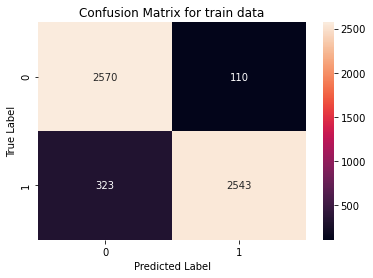

In [228]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_train, lr_sgd_train)
class_label = ["0","1"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix for train data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## ROC_AUC Score of train data

In [219]:
from sklearn.metrics import roc_auc_score
print("The train roc_auc is:",roc_auc_score(y_train,lr_sgd_train))

The train roc_auc is: 0.9231272979137808


## Confusion matrix of cv data

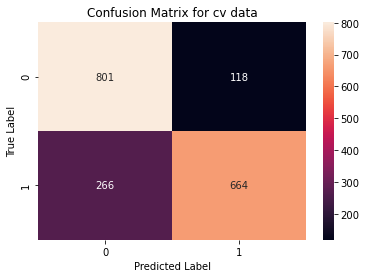

In [220]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_cv, lr_sgd_cv)
class_label = ["0","1"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix for cv data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [221]:
print("The cv roc_auc is:",roc_auc_score(y_cv,lr_sgd_cv))

The cv roc_auc is: 0.7927890296839716


## Precision and Recall of train and cv data

In [224]:
print("The precision score is:",precision_score(y_train,lr_sgd_train))
print("The recall score is:",recall_score(y_train,lr_sgd_train))

The precision score is: 0.9585375047116472
The recall score is: 0.8872993719469644


In [226]:
print("The precision score is:",precision_score(y_cv,lr_sgd_cv))
print("The recall score is:",recall_score(y_cv,lr_sgd_cv))

The precision score is: 0.8491048593350383
The recall score is: 0.7139784946236559


## Predicting test data whose original values are unknown to us

In [ ]:
lr_sgd_test = lr_sgd.predict(x_final_test)

In [ ]:
final_df = pd.DataFrame()
final_df['urlid'] = test_df['urlid']
final_df['label'] = lr_sgd_test

final_df.to_csv('/content/drive/MyDrive/StumbleUpon Evergreen Classification Challenge Internshala/sampleSubmission.csv',index=False)

## The Public and Private Score using Logistic Regression

In [ ]:
final_df = pd.DataFrame()
final_df['urlid'] = test_df['urlid']
final_df['label'] = lr_sgd_test

final_df.to_csv('/content/drive/MyDrive/StumbleUpon Evergreen Classification Challenge Internshala/sampleSubmission.csv',index=False)

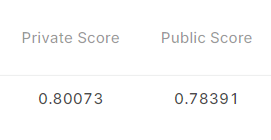

## Deep Learning Models

In [39]:
test_df.columns

Index(['title', 'body', 'url', 'urlid', 'alchemy_category', 'image_ratio',
       'numberOfLinks'],
      dtype='object')

In [40]:
test = test_df.drop(columns=['image_ratio','numberOfLinks'],axis=1)

In [41]:
from sklearn.preprocessing import LabelEncoder
import json
from tensorflow.keras.preprocessing import text, sequence
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras import layers 
from keras.layers import Reshape,Concatenate 
from tensorflow.keras.layers import Reshape
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LeakyReLU

In [42]:
from tensorflow.keras.layers import Input, Dense, Embedding, SpatialDropout1D, concatenate, Masking
from tensorflow.keras.layers import LSTM, Bidirectional, GlobalMaxPooling1D, Dropout
from tensorflow.keras.preprocessing import text, sequence
from tqdm import tqdm_notebook as tqdm
import tensorflow as tf
import tensorflow.keras
import pickle
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Input, Dense, Embedding, SpatialDropout1D, concatenate, Masking
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling2D

## Tokenizing the data and Padding

In [43]:
tokenizer1 = Tokenizer(lower=False, num_words=80000)

for text in tqdm(X_train.body.values):
    tokenizer1.fit_on_texts(text.split(" "))

tokenizer2 = Tokenizer(lower=False)

for text in tqdm(X_train.title.values):
    tokenizer2.fit_on_texts(text.split(" "))

tokenizer3 = Tokenizer(lower=False)

for text in tqdm(X_train.url.values):
    tokenizer3.fit_on_texts(text.split(" "))

  0%|          | 0/5546 [00:00<?, ?it/s]

  0%|          | 0/5546 [00:00<?, ?it/s]

  0%|          | 0/5546 [00:00<?, ?it/s]

In [44]:
pickle.dump(tokenizer1, open("tokenizer1.pickel", "wb"))
pickle.dump(tokenizer2, open("tokenizer2.pickel", "wb"))
pickle.dump(tokenizer3, open("tokenizer3.pickel", "wb"))

In [45]:
tokenizer1 = pickle.load(open("tokenizer1.pickel","rb"))
tokenizer2 = pickle.load(open("tokenizer2.pickel","rb"))
tokenizer3 = pickle.load(open("tokenizer3.pickel","rb"))

In [46]:
max_length1 = max([len(x) for x in X_train.body.values])
vocab_size = len(tokenizer1.word_index)+1
max_length1

31671

In [47]:
max_length2 = max([len(x) for x in X_train.title.values])
vocab_size = len(tokenizer2.word_index)+1
max_length2

278

In [48]:
max_length3 = max([len(x) for x in X_train.url.values])
vocab_size = len(tokenizer3.word_index)+1
max_length3

264

In [49]:
def compute_text1(X_train,X_cv,test,tokenizer):
    
    #train_text = tokenizer.texts_to_sequences(X_train.text.values)
    train = tokenizer1.texts_to_sequences(X_train.body.values)  
    cv = tokenizer1.texts_to_sequences(X_cv.body.values)  
    test = tokenizer1.texts_to_sequences(test.body.values)  
    
    #train_text = sequence.pad_sequences(train_text, maxlen=300)
    train_body = sequence.pad_sequences(train,maxlen=max_length1)
    cv_body = sequence.pad_sequences(cv,maxlen=max_length1)
    test_body = sequence.pad_sequences(test,maxlen=max_length1)

    return train_body,cv_body,test_body 

In [50]:
def compute_text2(X_train,X_cv,test,tokenizer):
    
    #train_text = tokenizer.texts_to_sequences(X_train.text.values)
    train = tokenizer2.texts_to_sequences(X_train.title)  
    cv = tokenizer2.texts_to_sequences(X_cv.title)  
    test = tokenizer2.texts_to_sequences(test.title)  
    
    #train_text = sequence.pad_sequences(train_text, maxlen=300)
    train_title = sequence.pad_sequences(train,maxlen=max_length2)
    cv_title = sequence.pad_sequences(cv,maxlen=max_length2)
    test_title = sequence.pad_sequences(test,maxlen=max_length2)

    return train_title,cv_title,test_title

In [51]:
def compute_text3(X_train,X_cv,test,tokenizer):
    
    #train_text = tokenizer.texts_to_sequences(X_train.text.values)
    train = tokenizer.texts_to_sequences(X_train.url.values)  
    cv = tokenizer.texts_to_sequences(X_cv.url.values)  
    test = tokenizer.texts_to_sequences(test.url.values)  
    
    #train_text = sequence.pad_sequences(train_text, maxlen=300)
    train_url = sequence.pad_sequences(train,maxlen=max_length3)
    cv_url = sequence.pad_sequences(cv,maxlen=max_length3)
    test_url = sequence.pad_sequences(test,maxlen=max_length3)

    return train_url,cv_url,test_url

In [52]:
train_body,cv_body,test_body = compute_text1(X_train,X_cv,test,tokenizer1)
train_title,cv_title,test_title = compute_text2(X_train,X_cv,test,tokenizer2)
train_url,cv_url,test_url = compute_text3(X_train,X_cv,test,tokenizer3)

In [53]:
train_body.shape

(5546, 31671)

## Using Glove Vectors

In [54]:
import pickle

with open('./StumbleUpon Evergreen Classification Challenge Internshala/glove_vectors', 'rb') as f:
 glove=pickle.load(f)
 glove_words=set(glove.keys())

embedd_matrix= np.zeros((len(tokenizer1.word_index)+1,300))
for i,j in tokenizer1.word_index.items():
  if i in glove_words:
   embed_vec=glove[i]
   embedd_matrix[j]=embed_vec
print(embed_vec.shape,embedd_matrix.shape)

(300,) (92624, 300)


In [55]:
train_title = train_title.reshape(train_title.shape[0],train_title.shape[1],1)
#train_body = train_body.reshape(train_body.shape[0],train_body.shape[1],1) 
train_url = train_url.reshape(train_url.shape[0],train_url.shape[1],1)

## Modelling

In [57]:
k = tf.keras.initializers.he_normal(seed=None)

In [62]:
b_in = Input(shape= (None,),name='body')
q= Embedding(*embedd_matrix.shape, weights=[embedd_matrix])(b_in)
q= layers.Bidirectional(tf.keras.layers.LSTM(32, activation="tanh",recurrent_activation="sigmoid",
                                         return_sequences=True))(q)
q=tf.keras.layers.LeakyReLU(alpha=0.3)(q) 
q= tensorflow.keras.layers.GlobalMaxPooling1D()(q)


t_in = Input(shape=train_title.shape[1:],name='title')  
t=Conv1D(32, kernel_size=(3), activation='relu',strides=1,name='title_conv1d')(t_in) 
t=Conv1D(64, kernel_size=(3), activation='relu', strides=1)(t) 
t=tf.keras.layers.LeakyReLU(alpha=0.3)(t)
t= tensorflow.keras.layers.GlobalMaxPooling1D()(t)

u_in = Input(shape=train_url.shape[1:],name='url')  
u=Conv1D(32, kernel_size=(3), activation='relu',strides=1,name='url_conv1d')(u_in) 
u=Conv1D(64, kernel_size=(3), activation='relu', strides=1)(u) 
u=tf.keras.layers.LeakyReLU(alpha=0.3)(u)
u= tensorflow.keras.layers.GlobalMaxPooling1D()(u)

concat1 = concatenate([q, t, u])
hidden = Dense(400, activation='relu',kernel_initializer=k)(concat1)
#hidden=tf.keras.layers.LeakyReLU(alpha=0.3)(hidden)
hidden = Dropout(0.2)(hidden)
hidden = Dense(450, activation='relu',kernel_initializer=k)(hidden)
#hidden=tf.keras.layers.LayerNormalization()(hidden)
#hidden=tf.keras.layers.LeakyReLU(alpha=0.3)(hidden)
hidden = Dropout(0.3)(hidden)
hidden = Dense(420, activation='relu',kernel_initializer=k)(hidden)
hidden = Dropout(0.3)(hidden)
hidden = Dense(420, activation='relu',kernel_initializer=k)(hidden)
#hidden=tf.keras.layers.LayerNormalization()(hidden)

    
out=Dense(1,activation='sigmoid',name='out')(hidden)

model = Model(inputs=[b_in, t_in, u_in], outputs=[out])
model.compile(loss={'out':'binary_crossentropy'} , 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
              metrics=[tf.keras.metrics.AUC()])
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
body (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
title (InputLayer)              [(None, 278, 1)]     0                                            
__________________________________________________________________________________________________
url (InputLayer)                [(None, 264, 1)]     0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 300)    27787200    body[0][0]                       
____________________________________________________________________________________________

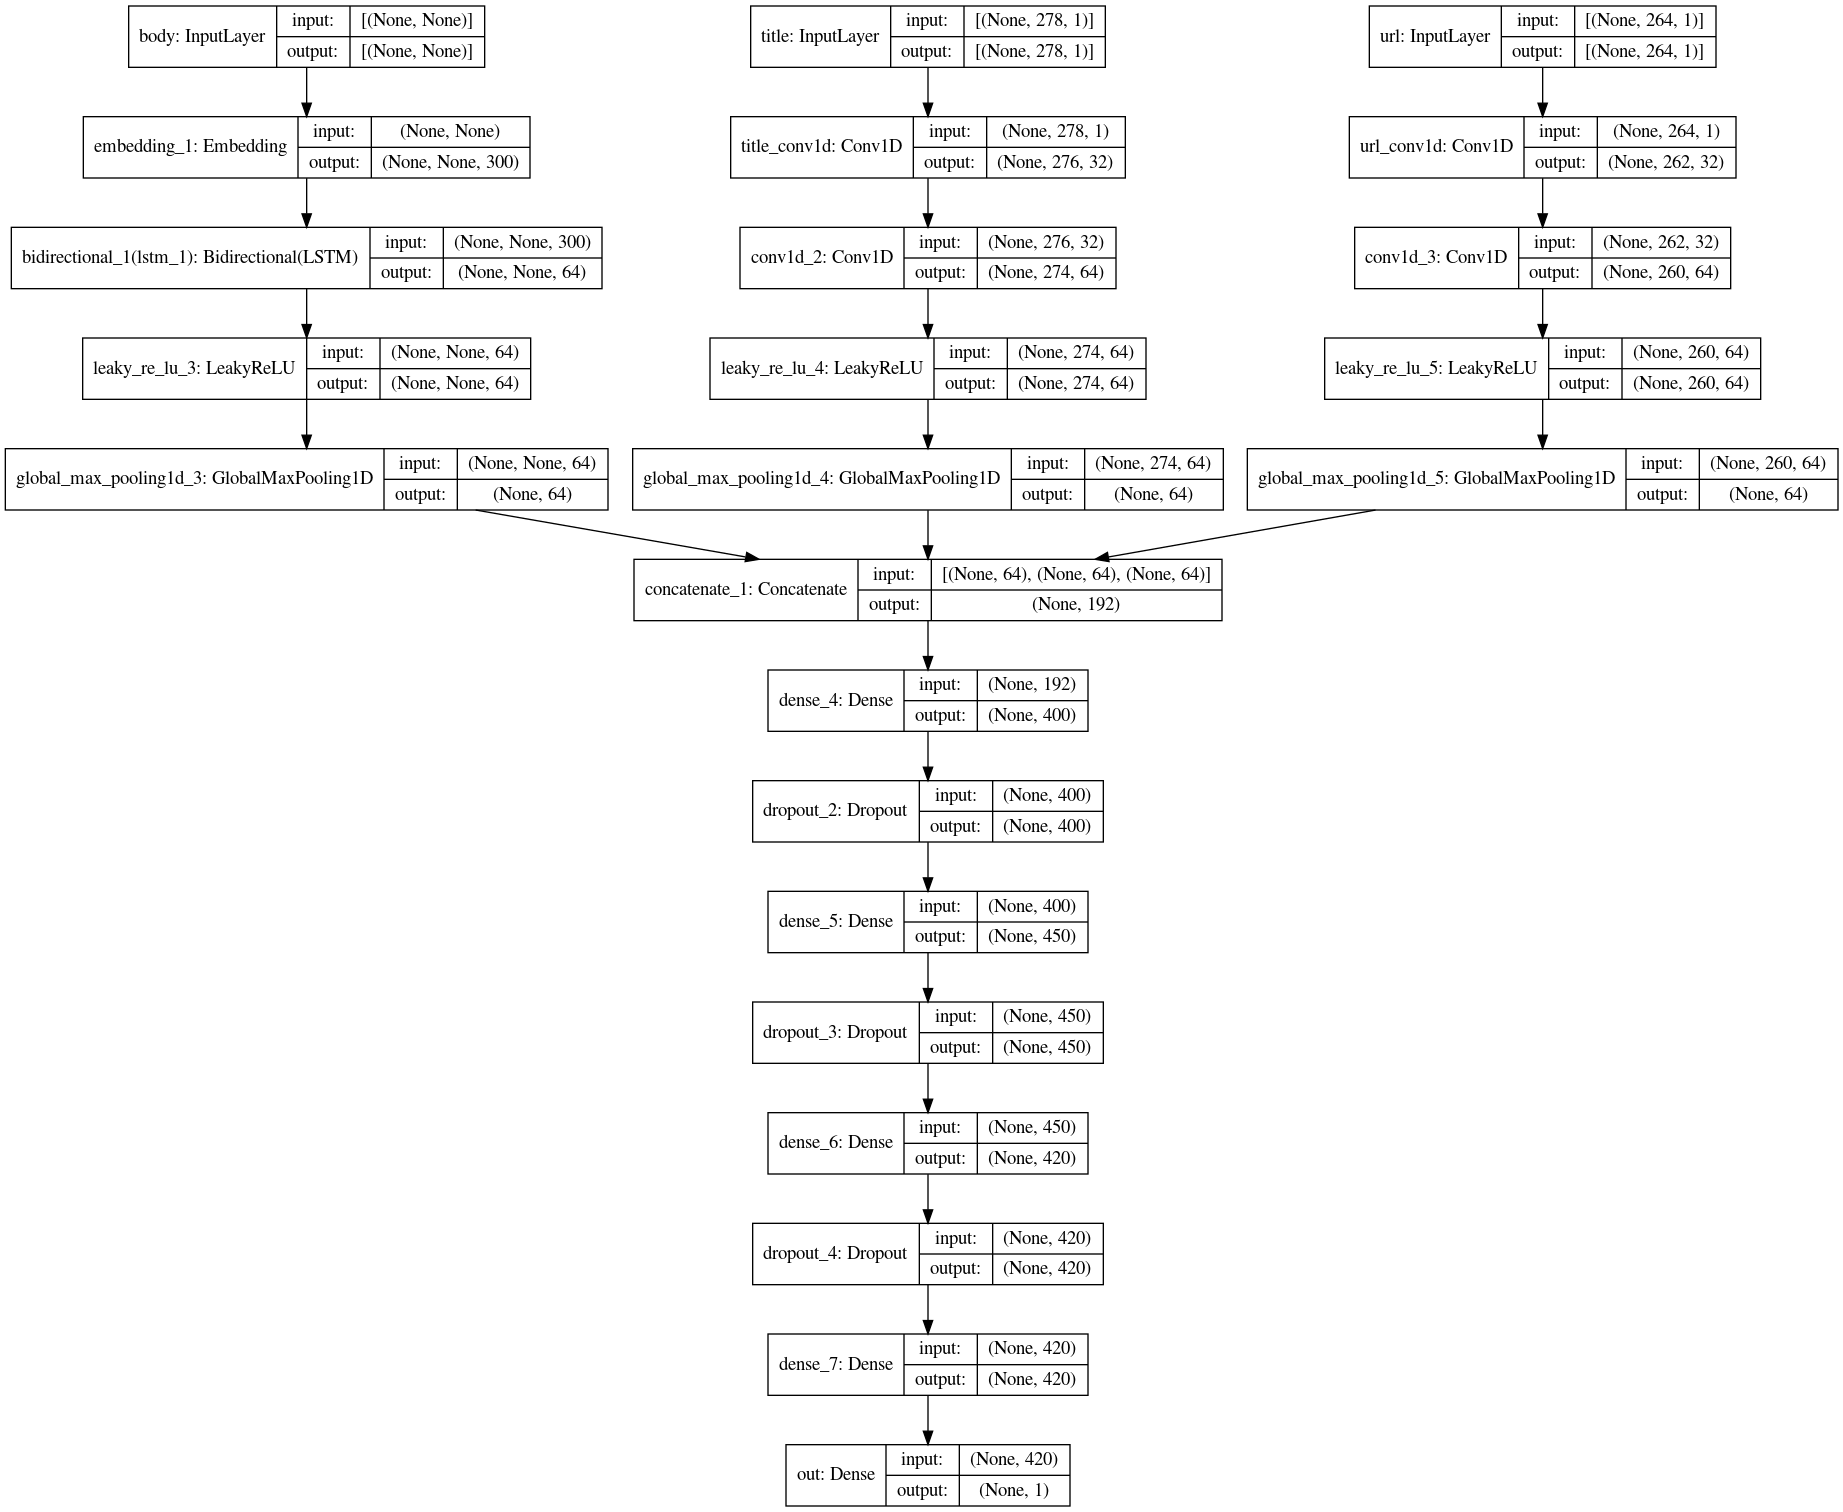

In [87]:
tf.keras.utils.plot_model(model,to_file="modellong.png",show_shapes=True)

In [63]:
import os
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

In [64]:
EPOCHS = 8
BATCH_SIZE = 50

## Training the model

In [65]:
train_history2 = model.fit({'body':train_body,'title':train_title, 'url':train_url}, 
                           {'out':y_train},
    epochs=EPOCHS,batch_size=BATCH_SIZE,validation_split=0.3)

Epoch 1/8
78/78 [==============================] - 316s 4s/step - loss: 2109.1309 - auc_1: 0.4962 - val_loss: 0.5809 - val_auc_1: 0.7686
Epoch 2/8
78/78 [==============================] - 310s 4s/step - loss: 0.5797 - auc_1: 0.7724 - val_loss: 0.5079 - val_auc_1: 0.8278
Epoch 3/8
78/78 [==============================] - 311s 4s/step - loss: 0.4593 - auc_1: 0.8785 - val_loss: 0.4985 - val_auc_1: 0.8471
Epoch 4/8
78/78 [==============================] - 311s 4s/step - loss: 0.3347 - auc_1: 0.9345 - val_loss: 0.5780 - val_auc_1: 0.8450
Epoch 5/8
78/78 [==============================] - 312s 4s/step - loss: 0.2677 - auc_1: 0.9596 - val_loss: 0.5600 - val_auc_1: 0.8439
Epoch 6/8
78/78 [==============================] - 309s 4s/step - loss: 0.2010 - auc_1: 0.9756 - val_loss: 0.8158 - val_auc_1: 0.8320
Epoch 7/8
78/78 [==============================] - 309s 4s/step - loss: 0.1828 - auc_1: 0.9787 - val_loss: 1.2710 - val_auc_1: 0.8264
Epoch 8/8
78/78 [==============================] - 310s 4s/

In [75]:
train_history2.history['val_auc_1']


[0.7685534954071045,
 0.8278364539146423,
 0.8470837473869324,
 0.8450466990470886,
 0.8439436554908752,
 0.8320005536079407,
 0.8263527154922485,
 0.8364415168762207]

## Plotting graphs

In [76]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Test AUC")
    ax.plot(x, ty, 'r', label="Train AUC")      
    plt.legend()
    plt.grid()
    fig.canvas.draw()

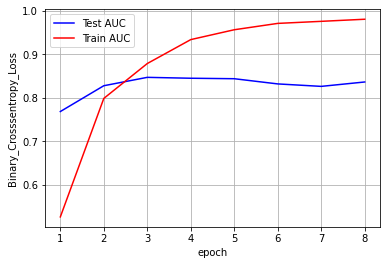

In [68]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Binary_Crosssentropy_Loss')

# list of epoch numbers
x = list(range(1,8+1))

vy = train_history2.history['val_auc_1']
ty = train_history2.history['auc_1']
plt_dynamic(x, vy, ty, ax)

In [77]:
result = model.evaluate({'body':cv_body,'title':cv_title, 'url':cv_url}, 
                           {'out':y_cv},batch_size=50)

37/37 [==============================] - 52s 1s/step - loss: 0.6869 - auc_1: 0.8284


## Predicting the data

In [78]:
pred = model.predict({'body':test_body,'title':test_title, 'url':test_url})

In [79]:
pred =(pred>0.5)

In [80]:
pred[:5]

array([[ True],
       [False],
       [False],
       [False],
       [False]])

In [81]:
l = []
for val in pred:
    if val[0]==True:
        l.append(1)
    else:
        l.append(0)
    

In [82]:
l[:5]

[1, 0, 0, 0, 0]

In [69]:
pred_cv = model.predict({'body':cv_body,'title':cv_title, 'url':cv_url})

In [70]:
pred_cv =(pred_cv>0.5)

In [71]:
pred_cv[0]

array([ True])

In [72]:
cv = []
for val in pred_cv:
    if val[0]==True:
        cv.append(1)
    else:
        cv.append(0)
    

## Confusion Matrix

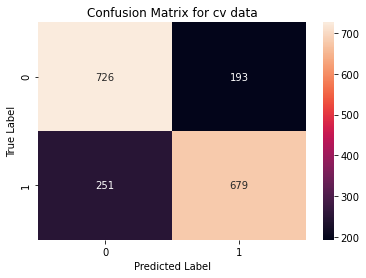

The cv roc_auc is: 0.760048322744451


In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_cv, cv)
class_label = ["0","1"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix for cv data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

from sklearn.metrics import roc_auc_score
print("The cv roc_auc is:",roc_auc_score(y_cv,cv))

## Precision and Recall of cv data

In [222]:
from sklearn.metrics import precision_score,recall_score

In [85]:
print("The precision score is:",precision_score(y_cv,cv))
print("The recall score is:",recall_score(y_cv,cv))

The precision score is: 0.7786697247706422
The recall score is: 0.7301075268817204


In [86]:
final_df = pd.DataFrame()
final_df['urlid'] = test_df['urlid']
final_df['label'] = l

final_df.to_csv('sampleSubmission.csv',index=False)

## Deep Learning Model using BERT Embeddings

In [93]:
!curl --header "Host: doc-0s-5c-docs.googleusercontent.com" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header "Accept-Language: en-US,en;q=0.9" --header "Cookie: AUTH_hpu11s1pld7o9bp1p8g1qieamukv1sta=11300042042739227959|1613572725000|uks8qtcjqfsijiancb1bmjda6v70j0f7" --header "Connection: keep-alive" "https://doc-0s-5c-docs.googleusercontent.com/docs/securesc/buh41koleo95ehjvigsb5hjcrtrndj6j/kasrman47ugur25nc0sjppvui534v7u2/1613572800000/11300042042739227959/11300042042739227959/1Vt7EEcump1FwudRLmmAv2i7panzxUPIf?e=download&authuser=1" -L -o "tokenization.py"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 17318  100 17318    0     0  58705      0 --:--:-- --:--:-- --:--:-- 58705


In [89]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Model

## Using Pretrained BERT Model to get the Embeddings

In [90]:
tf.keras.backend.clear_session()

# maximum length of a seq in the data we have, for now i am making it as 55. You can change this
max_seq_length = 200

#BERT takes 3 inputs

#this is input words. Sequence of words represented as integers
input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_word_ids")

#mask vector if you are padding anything
input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_mask")

#segment vectors. If you are giving only one sentence for the classification, total seg vector is 0. 
#If you are giving two sentenced with [sep] token separated, first seq segment vectors are zeros and 
#second seq segment vector are 1's
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="segment_ids") 

#bert layer 
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1", trainable=False) 
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])

#Bert model
#We are using only pooled output not sequence out. 
#If you want to know about those, please read https://www.kaggle.com/questions-and-answers/86510
bert_model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=pooled_output)

In [91]:
bert_model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 200)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 200)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 200)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]             

In [92]:
#getting Vocab file
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()


In [94]:
import tokenization
tokenizer= tokenization.FullTokenizer(vocab_file, do_lower_case)
pickle.dump(tokenizer, open("tokenizerf.pickel", "wb"))
tokenizer = pickle.load(open("tokenizerf.pickel","rb"))


## Filling the data with CLS and SEP tokens

In [95]:
max_seq_length=200
def TokenizeAndConvertToIds(text):
    tokens= tokenizer.tokenize(text) # tokenize the reviews
    tokens=tokens[0:(max_seq_length-2)] 
    tokens=['[CLS]',*tokens,'[SEP]'] # adding cls and sep at the end
    masked_array=np.array([1]*len(tokens) + [0]* (max_seq_length-len(tokens))) # masking 
    segment_array=np.array([0]*max_seq_length) 
    if(len(tokens)<max_seq_length): 
        padding=['[PAD]']*(max_seq_length-len(tokens)) # padding
        tokens=[*tokens,*padding] 
    tokentoid=np.array(tokenizer.convert_tokens_to_ids(tokens)) # converting the tokens to id
    return tokentoid,masked_array,segment_array

In [103]:
%%time
from tqdm import tqdm
X_train_tokens,X_cv_tokens,X_test_tokens=[],[],[]
X_train_mask,X_cv_mask,X_test_mask=[],[],[] 
X_train_segment,X_cv_segment,X_test_segment=[],[],[]
for i in tqdm(X_train['body']):
    tokentoid,masked_array,segment_array=TokenizeAndConvertToIds(i) 
    X_train_tokens.append(tokentoid) 
    X_train_mask.append(masked_array)
    X_train_segment.append(segment_array) 
for i in tqdm(X_cv['body']): 
    tokentoid,masked_array,segment_array=TokenizeAndConvertToIds(i)
    X_cv_tokens.append(tokentoid)
    X_cv_mask.append(masked_array)
    X_cv_segment.append(segment_array)
for i in tqdm(test_df['body']): 
    tokentoid,masked_array,segment_array=TokenizeAndConvertToIds(i)
    X_test_tokens.append(tokentoid)
    X_test_mask.append(masked_array)
    X_test_segment.append(segment_array)
X_train_tokens,X_cv_tokens,X_test_tokens=np.asarray(X_train_tokens),np.asarray(X_cv_tokens),np.asarray(X_test_tokens)
X_train_mask,X_cv_mask,X_test_mask=np.asarray(X_train_mask),np.asarray(X_cv_tokens),np.asarray(X_test_mask) 
X_train_segment,X_cv_segment,X_test_segment=np.asarray(X_train_segment),np.asarray(X_cv_tokens),np.asarray(X_test_segment) 

100%|██████████| 3171/3171 [00:37<00:00, 84.14it/s] 

CPU times: user 2min 5s, sys: 721 ms, total: 2min 6s
Wall time: 2min 6s


## Getting the pretrained Embeddings

In [104]:
X_train_pooled_output=bert_model.predict([X_train_tokens,X_train_mask,X_train_segment])

In [105]:
X_cv_pooled_output=bert_model.predict([X_cv_tokens,X_cv_mask,X_cv_segment])


In [106]:
X_test_pooled_output=bert_model.predict([X_test_tokens,X_test_mask,X_test_segment]) 

In [107]:
X_traint=X_train_pooled_output.reshape(X_train_pooled_output.shape[0],X_train_pooled_output.shape[1],1) 


In [147]:
k = tf.keras.initializers.glorot_normal(seed=None)

In [162]:
import tensorflow as tf 
import tensorflow_addons as tfa 
opt = tf.keras.optimizers.Adamax(learning_rate=0.03)
opt = tfa.optimizers.SWA(opt)

## Modelling

In [227]:
b_in = Input(shape= (None,),name='body')
q= Embedding(*embedd_matrix.shape, weights=[embedd_matrix])(b_in)
q= tf.keras.layers.GRU(70, activation="tanh",recurrent_activation="sigmoid",
                                         return_sequences=True)(q)
q=tf.keras.layers.LeakyReLU(alpha=0.3)(q) 
q= tensorflow.keras.layers.GlobalMaxPooling1D()(q)


t_in = Input(shape=train_title.shape[1:],name='title')  
t=Conv1D(70, kernel_size=(3), activation='relu',strides=1,name='title_conv1d')(t_in) 
t=Conv1D(64, kernel_size=(3), activation='relu', strides=1)(t) 
t=tf.keras.layers.LeakyReLU(alpha=0.3)(t)
t= tensorflow.keras.layers.GlobalMaxPooling1D()(t)

u_in = Input(shape=train_url.shape[1:],name='url')  
u=Conv1D(70, kernel_size=(3), activation='relu',strides=1,name='url_conv1d')(u_in) 
u=Conv1D(64, kernel_size=(3), activation='relu', strides=1)(u) 
u=tf.keras.layers.LeakyReLU(alpha=0.3)(u)
u= tensorflow.keras.layers.GlobalMaxPooling1D()(u)

concat1 = concatenate([q, t, u])
hidden = Dense(700, activation='relu',kernel_initializer=k)(concat1)
hidden=tf.keras.layers.LeakyReLU(alpha=0.2)(hidden)
#hidden = Dropout(0.2)(hidden)
hidden = Dense(600, activation='relu',kernel_initializer=k)(hidden)
#hidden=tf.keras.layers.LayerNormalization()(hidden)
hidden=tf.keras.layers.LeakyReLU(alpha=0.2)(hidden)

hidden = Dense(600, activation='relu',kernel_initializer=k)(hidden)
#hidden = Dropout(0.2)(hidden)
hidden = Dropout(0.3)(hidden)
hidden = Dense(500, activation='relu',kernel_initializer=k)(hidden)

#hidden=tf.keras.layers.LayerNormalization()(hidden)

    
out=Dense(1,activation='sigmoid',name='out')(hidden)

model1 = Model(inputs=[b_in, t_in, u_in], outputs=[out])
model1.compile(loss={'out':'binary_crossentropy'} , 
              optimizer=tf.keras.optimizers.Adamax(learning_rate=0.02),
              metrics=[tf.keras.metrics.AUC()])
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
body (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
title (InputLayer)              [(None, 278, 1)]     0                                            
__________________________________________________________________________________________________
url (InputLayer)                [(None, 264, 1)]     0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, None, 300)    27787200    body[0][0]                       
____________________________________________________________________________________________

## Training

In [182]:
train_history2 = model1.fit({'body':X_traint,'title':train_title, 'url':train_url}, 
                           {'out':y_train},
    epochs=40,batch_size=100,validation_split=0.3)

Epoch 1/40
39/39 [==============================] - 10s 146ms/step - loss: 63350.6085 - auc_32: 0.4968 - val_loss: 0.6867 - val_auc_32: 0.5862
Epoch 2/40
39/39 [==============================] - 5s 132ms/step - loss: 0.7016 - auc_32: 0.5227 - val_loss: 0.6824 - val_auc_32: 0.5902
Epoch 3/40
39/39 [==============================] - 5s 134ms/step - loss: 0.6832 - auc_32: 0.5882 - val_loss: 0.6833 - val_auc_32: 0.6000
Epoch 4/40
39/39 [==============================] - 5s 131ms/step - loss: 0.6875 - auc_32: 0.5612 - val_loss: 0.6840 - val_auc_32: 0.5992
Epoch 5/40
39/39 [==============================] - 5s 130ms/step - loss: 0.6750 - auc_32: 0.5928 - val_loss: 0.6755 - val_auc_32: 0.6081
Epoch 6/40
39/39 [==============================] - 5s 128ms/step - loss: 0.6815 - auc_32: 0.5923 - val_loss: 0.6859 - val_auc_32: 0.5803
Epoch 7/40
39/39 [==============================] - 5s 132ms/step - loss: 0.6730 - auc_32: 0.6062 - val_loss: 0.6769 - val_auc_32: 0.6097
Epoch 8/40
39/39 [===========